## Experiments with $\alpha$-values 

This file explores how the $\alpha$-parameter (in the initial guess) affects computation speed.

We fix `grid_max=1e6` based on the numerical experiments in `ex_grid_max.ipynb`.

For each specification, the statistics are calculated by averaging $N$ repeated experiments.

### Parallel Computing

The code has been parallelized, so it runs very fast, and the time taken is relatively less sensitive to the grid size of asset/saving. 

In [1]:
run optimality

In [13]:
tol = 1e-5                                   # tolerance level to terminate time iteration
grid_max, grid_med = 1e6, 10                 # maximum and median grid points for saving
grid_sizes = 1000*np.ones(50).astype('int')  # number of grid points for asset/saving, int64[:]
α_space = exp_grids(gmin=1e-5, gmax=1, gmed=5e-3, N=51)

#### Calculating the mean steps and computation time for policy iteration to converge

In [14]:
step_conv, time_elap = speed_conv(α_space, grid_sizes,
                                  grid_max, grid_med,
                                  tol=tol, verbose=False)
mean_step = step_conv.mean(axis=1)  # mean step for policy iteration to converge
mean_time = time_elap.mean(axis=1)  # mean computation time for policy iteration to converge

Alternatively, one can uncomment the next block and read the saved data to avoid re-calculation.

In [ ]:
#dat = np.load('simulated data/ex_alpha_plot_50avg.dat.npz')
#mean_step = dat['step_conv'].mean(axis=1)  # mean step for policy iteration to converge
#mean_time = dat['time_elap'].mean(axis=1)  # mean computation time for policy iteration to converge

#### Mean step for policy iteration to converge

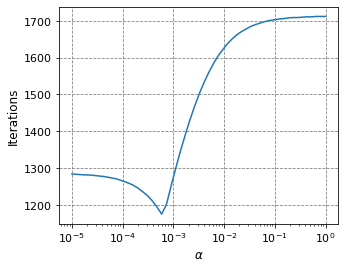

In [19]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(α_space, mean_step)
ax.set_xlabel('$\\alpha$', fontsize=12)
ax.set_ylabel('Iterations', fontsize=12)
ax.grid(ls='--', color='grey')
ax.tick_params(labelsize=11)
plt.xscale('log')
plt.savefig('fig_iter.pdf', bbox_inches='tight', pad_inches=0.05)  # dpi=500, 
plt.show()

#### Mean time for policy iteration to converge

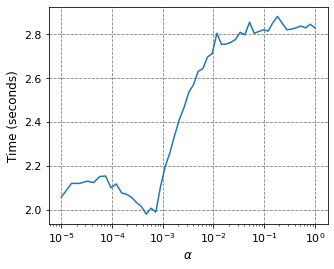

In [20]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(α_space, mean_time)
ax.set_xlabel('$\\alpha$', fontsize=12)
ax.set_ylabel('Time (seconds)', fontsize=12)
ax.grid(ls='--', color='grey')
ax.tick_params(labelsize=11)
plt.xscale('log')
plt.savefig('fig_time.pdf', bbox_inches='tight', pad_inches=0.05)  # dpi=500, 
plt.show()

In [21]:
#np.savez('simulated data/ex_alpha_plot_50avg.dat', step_conv=step_conv, time_elap=time_elap)